In [1]:
from glob import glob

import matplotlib.pyplot as plt
import numpy as np

In [2]:
BASE_DIR = "/gws/nopw/j04/ai4er/users/pn341/climate-rl"
STEPS_DIR = f"{BASE_DIR}/steps"

In [3]:
EXP_VERSION = "v0"

steps_fn = sorted(glob(STEPS_DIR + f"/{EXP_VERSION}*/*/*.pkl"))

In [4]:
import pickle

with open(steps_fn[-1], "rb") as file:
    steps = pickle.load(file)

alg = steps_fn[-1].split("__")[1].split("_")[0]

In [5]:
plt.rcParams.update({"font.size": 12})

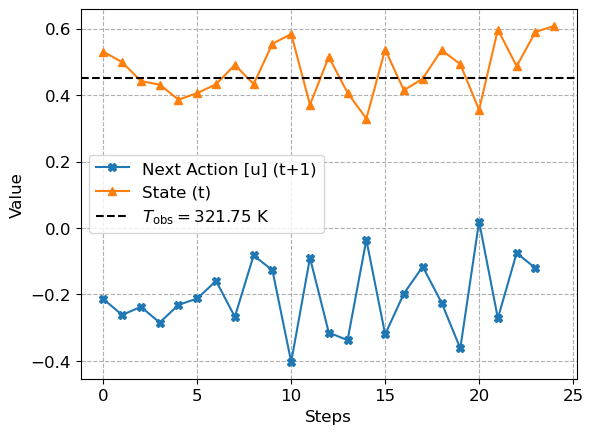

In [6]:
plt.plot(
    [x["actions"][0][0] for x in steps[-24:]],
    label="Next Action [u] (t+1)",
    marker="X",
)
plt.plot(
    [x["next_obs"][0][0] for x in steps[-25:]],
    label="State (t)",
    marker="^",
)
plt.axhline(y=0.45, c="k", ls="--", label="$T_{\mathrm{obs}} = 321.75$ K")
plt.grid(True, ls="--")
plt.xlabel("Steps")
plt.ylabel("Value")
plt.legend()

plt.savefig(
    f"{BASE_DIR}/results/imgs/{alg}_{EXP_VERSION}_actions_25.pdf",
    format="pdf",
    bbox_inches="tight",
)

plt.show()

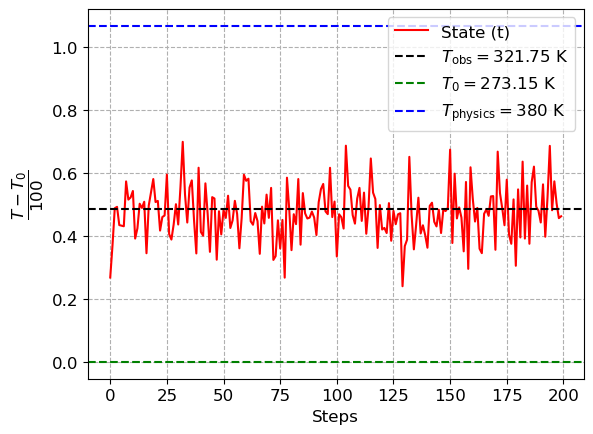

In [7]:
plt.plot(
    [x["next_obs"][0][0] for x in steps[-1800:-1600]], label="State (t)", c="r"
)
plt.axhline(
    y=(321.75 - 273.15) / 100,
    c="k",
    ls="--",
    label="$T_{\mathrm{obs}} = 321.75$ K",
)
plt.axhline(y=0, c="g", ls="--", label="$T_0 = 273.15$ K")
plt.axhline(
    y=(380 - 273.15) / 100,
    c="b",
    ls="--",
    label="$T_{\mathrm{physics}} = 380$ K",
)
plt.grid(True, ls="--")
plt.xlabel("Steps")
plt.ylabel("$\dfrac{T - T_0}{100}$")
plt.legend()

plt.savefig(
    f"{BASE_DIR}/results/imgs/scbc_temp_evolution.pdf",
    format="pdf",
    bbox_inches="tight",
)

plt.show()